In [1]:
import sys
import numpy
import time
import matplotlib
from matplotlib import pyplot
sys.path.append('../')
sys.path.append('../../../../redundant_calibration/code/')

In [2]:
from SCAR.SkyModel import analytic_visibilities
from gain_variance_simulation import get_observations

from skymodel import SkyRealisation
from radiotelescope import RadioTelescope
from radiotelescope import beam_width

In [14]:
position_path = "../Data/MWA_All_Coordinates_Cath.txt"
frequency_range = numpy.linspace(135, 165, 100) * 1e6

n_sources = 100
fluxes = numpy.random.uniform(0.1, 1, n_sources)
l_coordinates = numpy.random.uniform( -1, 1, n_sources)
m_coordinates = numpy.random.uniform( -1, 1, n_sources)

telescope = RadioTelescope(load=True, path=position_path)
source_population = SkyRealisation(sky_type='random')
#print(len(source_population.fluxes))
#source_population = SkyRealisation(sky_type = 'point', fluxes = fluxes, l_coordinates = l_coordinates, 
#                                   m_coordinates = m_coordinates)


In [15]:

t0 = time.perf_counter()
dumb = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'numba')
t1 = time.perf_counter()
print(t1-t0)

313.1331820189953


In [9]:
t0 = time.perf_counter()
analytic = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'analytic')
t1 = time.perf_counter()
print(t1-t0)

53.244915814953856


In [ ]:
t0 = time.perf_counter()

splined = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'spline')
t1 = time.perf_counter()
print(t1-t0)

In [ ]:
t0 = time.perf_counter()

regular = get_observations(source_population, telescope.baseline_table, frequency_range = frequency_range,
                           interpolation = 'linear')
t1 = time.perf_counter()
print(t1-t0)

<IPython.core.display.Javascript object>


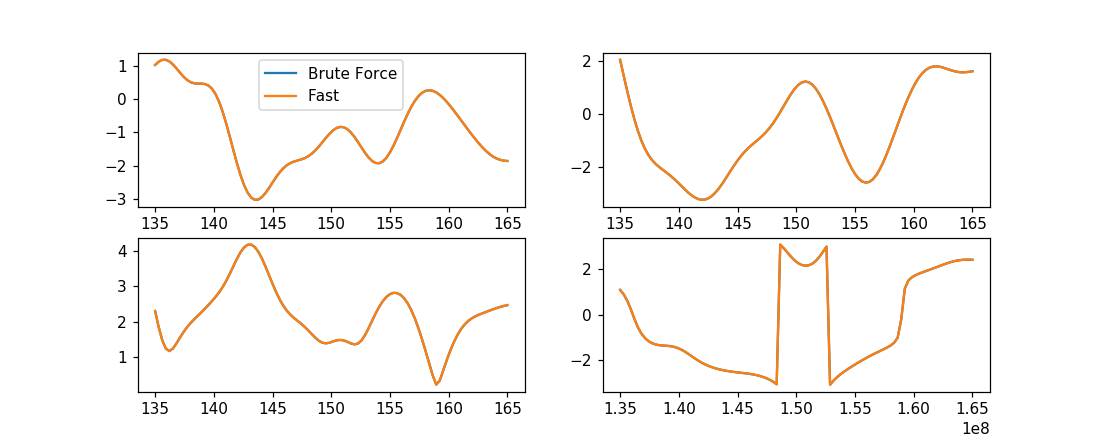

In [12]:
dumb_data = dumb[600, :]
smart_data = analytic[600, :]
%matplotlib notebook

figure = pyplot.figure(figsize = (10,4))
real_axes = figure.add_subplot(2,2,1)
imag_axes = figure.add_subplot(2,2,2)
amp_axes = figure.add_subplot(2,2,3)
phas_axes = figure.add_subplot(2,2,4)

real_axes.plot(frequency_range/1e6, numpy.real(dumb_data) , label = 'Brute Force')
real_axes.plot(frequency_range/1e6, numpy.real(smart_data) , label = 'Fast')
#real_axes.scatter(numpy.real(analytic), numpy.real(splined) - numpy.real(analytic), label = 'Spline')

imag_axes.plot(frequency_range/1e6, numpy.imag(dumb_data), label = 'Brute Force')
imag_axes.plot(frequency_range/1e6, numpy.imag(smart_data), label = 'Fast')

#imag_axes.scatter(numpy.imag(analytic), numpy.imag(splined), label = 'Spline')

amp_axes.plot(frequency_range/1e6, numpy.abs(dumb_data), label = 'Brute Force')
amp_axes.plot(frequency_range/1e6, numpy.abs(smart_data),label = 'Fast')

#amp_axes.scatter(numpy.abs(analytic), numpy.abs(splined), label = 'Spline')

phas_axes.plot(frequency_range, numpy.angle(dumb_data), label = 'Brute Force')
phas_axes.plot(frequency_range, numpy.angle(smart_data), label = 'Fast')
#phas_axes.scatter(numpy.angle(analytic), numpy.angle(splined), label = 'Spline')

real_axes.legend()

In [ ]:
a = numpy.zeros((55000,100), dtype = complex)
print(a.nbytes/1e9)

In [ ]:
print(ln(b))